# Question 1
- Pick any file (or files) in NLTK package.
- Prove if Zipf's law works in Natural Language or not.

In [42]:
#Importing the nltk
import nltk

In [44]:
#Displaying the files from webtext package
nltk.corpus.webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [49]:
#To get the os address path of the text file "wine.txt" of NLTK package
nltk.corpus.webtext.abspath('wine.txt')

FileSystemPathPointer('C:\\Users\\Malick\\AppData\\Roaming\\nltk_data\\corpora\\webtext\\wine.txt')

In [25]:
#Fetching the input text file using glob module
import glob
import os
file_disk = [os.path.basename(c) for c in glob.glob('C:/Users/Malick/AppData/Roaming/nltk_data/corpora/webtext/*.txt')]
print(file_disk)

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


In [26]:
#Spliting the raw text into words and striping the special characters 
import string
wine_words = nltk.corpus.webtext.raw(file_disk[5])
wine_words.split()
wine_strip = [word.strip(string.punctuation) for word in wine_words.split()]

In [27]:
#Using lambda function making all characters to lowercase
wine_lower = list(map(lambda x:x.lower(),wine_strip))

In [28]:
#Using lambda function filtering only the alphabet character words
wine_alpha = list(filter(lambda x: x.isalpha(), wine_lower))

In [29]:
#importing the stop words from nltk and saved in list "stopwordlist"
stopwordlist = []
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')

In [30]:
#Using a fuction removing the stop words from "wine_alpha"
def func():
    wine_nostopwords = []
    for k in wine_alpha:
        if k not in stopwordlist:
            wine_nostopwords.append(k)
    return wine_nostopwords

In [31]:
#Importing Frequency Distribution from nltk package
from nltk import FreqDist
#Calculating the frequency and stored in dictionery "wine_fdist"
wine_fdist = FreqDist(func())
#The total number of words taken for the analysis of the natural language which will be matching the total frequency in CSV file
len(func())

14171

In [39]:
#Sorting the dictionery with highest frequency in the top and displaying it in the expected format along with headings
wordrow = ['Word']
rankrow = ['Rank']
freqrow = ['Frequency']
rank = 0 
print ("Word"  +  "    \t \t  " + "Rank" +  " \t  " + "Frequency")
for w in sorted(wine_fdist, key=wine_fdist.get, reverse=True):
    rank = rank + 1
    print (repr(w)  +  "   \t \t  " + repr(rank) +  "   \t  " + repr(wine_fdist[w]))
    wordrow.append(w)
    rankrow.append(rank)
    freqrow.append(wine_fdist[w])

Word    	 	  Rank 	  Frequency
'good'   	 	  1   	  363
'quite'   	 	  2   	  303
'fruit'   	 	  3   	  295
'wine'   	 	  4   	  230
'bit'   	 	  5   	  217
'top'   	 	  6   	  215
'lovely'   	 	  7   	  163
'touch'   	 	  8   	  160
'nose'   	 	  9   	  150
'nice'   	 	  10   	  148
'dry'   	 	  11   	  142
'bare'   	 	  12   	  141
'rather'   	 	  13   	  133
'palate'   	 	  14   	  115
'fine'   	 	  15   	  102
'rich'   	 	  16   	  96
'still'   	 	  17   	  92
'drinking'   	 	  18   	  88
'perhaps'   	 	  19   	  88
'long'   	 	  20   	  79
'really'   	 	  21   	  77
'finish'   	 	  22   	  77
'time'   	 	  23   	  76
'balance'   	 	  24   	  71
'bottle'   	 	  25   	  71
'slightly'   	 	  26   	  66
'seems'   	 	  27   	  65
'acidity'   	 	  28   	  64
'pleasant'   	 	  29   	  63
'nicely'   	 	  30   	  63
'vintage'   	 	  31   	  62
'elegant'   	 	  32   	  62
'well'   	 	  33   	  62
'one'   	 	  34   	  61
'complex'   	 	  35   	  59
'mineral'   	 	  36   	  57
'length'   	 	 

In [40]:
#Writing the above printed output to a CSV file and generated a log-log graph for that in the CSV file 
#Using the local directory address path so the it can be used from any machine
import csv
with open ('Q1_WordRanking.csv', 'w' , newline='') as f:
    w = csv.writer(f,delimiter = ',')
    for i in range (len(wordrow)):
        w.writerow([wordrow[i], rankrow[i], freqrow[i]])

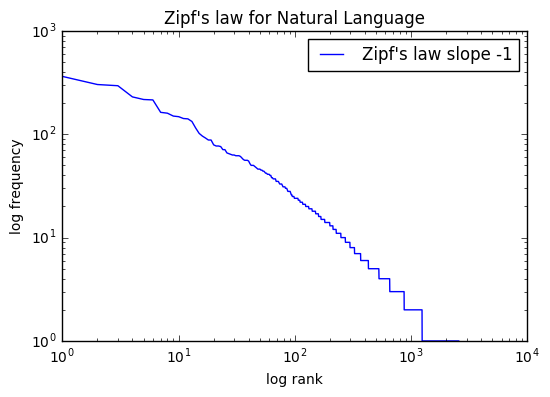

CONCLUTION
Zipf's law works in Natural Language of the webtext package for the wine.txt which results with slope -1


In [41]:
#importing the data from the CSV file and a log-log graph is drawn using matplotlib with rank and frequency of the words
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

with open('Q1_WordRanking.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[1])
        y.append(row[2])
del x[0]
x = [int(i) for i in x]
del y[0]
y = [int(i) for i in y]

plt.loglog(x,y, label="Zipf's law slope -1")
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.title("Zipf's law for Natural Language")
plt.legend()
#Displaying the log-log graph
plt.show()
print("CONCLUTION")
print("Zipf's law works in Natural Language of the webtext package for the wine.txt which results with slope -1")